In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/informer-val-code/archive/Informer2020-main/Dockerfile
/kaggle/input/informer-val-code/archive/Informer2020-main/LICENSE
/kaggle/input/informer-val-code/archive/Informer2020-main/Makefile
/kaggle/input/informer-val-code/archive/Informer2020-main/README.md
/kaggle/input/informer-val-code/archive/Informer2020-main/environment.yml
/kaggle/input/informer-val-code/archive/Informer2020-main/requirements.txt
/kaggle/input/informer-val-code/archive/Informer2020-main/main_informer.py
/kaggle/input/informer-val-code/archive/Informer2020-main/utils/metrics.py
/kaggle/input/informer-val-code/archive/Informer2020-main/utils/tools.py
/kaggle/input/informer-val-code/archive/Informer2020-main/utils/masking.py
/kaggle/input/informer-val-code/archive/Informer2020-main/utils/timefeatures.py
/kaggle/input/informer-val-code/archive/Informer2020-main/utils/__init__.py
/kaggle/input/informer-val-code/archive/Informer2020-main/scripts/ETTh2.sh
/kaggle/input/informer-val-code/archive/Informer2020

In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 14.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-cp310-cp310-linux_x86_64.whl size=300449 sha256=40beaa8eeaf766879795438e716b3d419c34f643d79c066746519d1239da7f55
  Stored in directory: /root/.cache/pip/wheels/8d/0e/f8/48eb93a200fca4c502d7590613616fa4d2c9533f7308f9e28a
Successfully built peewee


In [3]:
!rm -rf /kaggle/working/

rm: cannot remove '/kaggle/working/': Device or resource busy


In [105]:
import yfinance as yf

# Define the ticker symbol for Adani stocks (e.g., Adani Ports - ADANIPORTS.NS)
ticker_symbol = 'INFY.NS'  # You can replace this with other Adani stocks as needed

# Fetch the stock data
stock_data = yf.download(ticker_symbol, interval='1h', period='max')  # Fetch data for the last 30 days




[*********************100%***********************]  1 of 1 completed


In [106]:
import pandas as pd

# Assuming 'stock_data' is your DataFrame with 'Datetime' as index
# Reset the index to move the 'Datetime' to a regular column
stock_data_reset = stock_data.reset_index()

# Convert the 'Datetime' to the format 'YYYY/MM/DD HH:MM' and rename the column to 'date'
stock_data_reset['date'] = stock_data_reset['Datetime'].dt.strftime('%Y/%m/%d %H:%M')

# Drop the original 'Datetime' column
stock_data_reset = stock_data_reset.drop('Datetime', axis=1)

# Reorder the columns as per your requirement (if needed)
stock_data_reset = stock_data_reset[['date', 'Open', 'Low', 'High', 'Close', 'Volume']]

# Display the modified DataFrame
stock_data_reset.head()


,date,Open,Low,High,Close,Volume
0,2022/10/20 09:15,1477.849976,1476.099976,1495.550049,1491.099976,0
1,2022/10/20 10:15,1491.099976,1488.199951,1495.000000,1494.150024,403093
2,2022/10/20 11:15,1494.150024,1493.150024,1498.900024,1497.949951,489175
3,2022/10/20 12:15,1498.000000,1497.550049,1503.949951,1502.400024,488954
4,2022/10/20 13:15,1502.449951,1498.800049,1503.599976,1501.500000,465838


In [107]:
stock_data_reset.to_csv('infosys.csv')

In [108]:
import argparse
import os
import torch
import sys
import pandas as pd
sys.path.append('/kaggle/input/informer-shuffle/informer_test_on_val/Informer2020-main')
print(sys.path)
from data.data_loader import Dataset_ETT_hour, Dataset_ETT_minute, Dataset_Custom, Dataset_Pred
import matplotlib.pyplot as plt

['/kaggle/lib/kagglegym', '/kaggle/lib', '/opt/conda/lib/python310.zip', '/opt/conda/lib/python3.10', '/opt/conda/lib/python3.10/lib-dynload', '', '/root/.local/lib/python3.10/site-packages', '/opt/conda/lib/python3.10/site-packages', '/root/src/BigQuery_Helper', '/kaggle/input/informer-shuffle/informer_test_on_val/Informer2020-main', '/kaggle/input/informer-shuffle/informer_test_on_val/Informer2020-main', '/kaggle/input/informer-shuffle/informer_test_on_val/Informer2020-main', '/kaggle/input/informer-shuffle/informer_test_on_val/Informer2020-main']


In [132]:
import os
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import argparse
import os
import torch

from exp.exp_informer import Exp_Informer

parser = argparse.ArgumentParser(description='[Informer] Long Sequences Forecasting')

parser.add_argument('--model', type=str, default='informer',
                    help='model of experiment, options: [informer, informerstack, informerlight(TBD)]')

parser.add_argument('--data', type=str, default='custom', help='data')
parser.add_argument('--root_path', type=str, default='', help='root path of the data file')
parser.add_argument('--data_path', type=str, default='/data/infosys.csv', help='data file')
parser.add_argument('--features', type=str, default='MS',
                    help='forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate')
parser.add_argument('--target', type=str, default='Close', help='target feature in S or MS task')
parser.add_argument('--freq', type=str, default='h',
                    help='freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h')
parser.add_argument('--checkpoints', type=str, default='./checkpoints/', help='location of model checkpoints')

parser.add_argument('--seq_len', type=int, default=96, help='input sequence length of Informer encoder')
parser.add_argument('--label_len', type=int, default=48, help='start token length of Informer decoder')
parser.add_argument('--pred_len', type=int, default=1, help='prediction sequence length')
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

parser.add_argument('--enc_in', type=int, default=6, help='encoder input size')
parser.add_argument('--dec_in', type=int, default=6, help='decoder input size')
parser.add_argument('--c_out', type=int, default=1, help='output size')
parser.add_argument('--d_model', type=int, default=512, help='dimension of model')
parser.add_argument('--n_heads', type=int, default=8, help='num of heads')
parser.add_argument('--e_layers', type=int, default=4, help='num of encoder layers')
parser.add_argument('--d_layers', type=int, default=1, help='num of decoder layers')
parser.add_argument('--s_layers', type=str, default='3,2,1', help='num of stack encoder layers')
parser.add_argument('--d_ff', type=int, default=2048, help='dimension of fcn')
parser.add_argument('--factor', type=int, default=5, help='probsparse attn factor')
parser.add_argument('--padding', type=int, default=0, help='padding type')
parser.add_argument('--distil', action='store_false',
                    help='whether to use distilling in encoder, using this argument means not using distilling',
                    default=True)
parser.add_argument('--dropout', type=float, default=0.05, help='dropout')
parser.add_argument('--attn', type=str, default='full', help='attention used in encoder, options:[prob, full]')
parser.add_argument('--embed', type=str, default='learned',
                    help='time features encoding, options:[timeF, fixed, learned]')
parser.add_argument('--activation', type=str, default='gelu', help='activation')
parser.add_argument('--output_attention', action='store_true', help='whether to output attention in ecoder')
parser.add_argument('--do_predict', action='store_true', help='whether to predict unseen future data')
parser.add_argument('--mix', action='store_false', help='use mix attention in generative decoder', default=True)
parser.add_argument('--cols', type=str, nargs='+', help='certain cols from the data files as the input features')
parser.add_argument('--num_workers', type=int, default=0, help='data loader num workers')
parser.add_argument('--itr', type=int, default=1, help='experiments times')
parser.add_argument('--train_epochs', type=int, default=20, help='train epochs')
parser.add_argument('--batch_size', type=int, default=16, help='batch size of train input data')
parser.add_argument('--patience', type=int, default=5, help='early stopping patience')
parser.add_argument('--learning_rate', type=float, default=0.0001, help='optimizer learning rate')
parser.add_argument('--des', type=str, default='test', help='exp description')
parser.add_argument('--loss', type=str, default='mse', help='loss function')
parser.add_argument('--lradj', type=str, default='type1', help='adjust learning rate')
parser.add_argument('--use_amp', action='store_true', help='use automatic mixed precision training', default=False)
parser.add_argument('--inverse', action='store_true', help='inverse output data', default=True)

parser.add_argument('--use_gpu', type=bool, default=True, help='use gpu')
parser.add_argument('--gpu', type=int, default=0, help='gpu')
parser.add_argument('--use_multi_gpu', action='store_true', help='use multiple gpus', default=False)
parser.add_argument('--devices', type=str, default='0,1', help='device ids of multile gpus')


args = parser.parse_known_args()[0]

args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = '0,1'
    args.devices = args.devices.replace(' ', '')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.device_ids = [0,1]
    args.device_count = 2
#     args.gpu = args.device_ids[0]


data_parser = {
  
    'TCS': {'data': 'tcs_t2v_70ave.csv', 'T': '70_ave', 'M': [18, 18, 18], 'S': [1, 1, 1], 'MS': [18, 18, 1]},
    'TCS2': {'data': 'tcs_hourly.csv', 'T': '70_ave', 'M': [6, 6, 6], 'S': [1, 1, 1], 'MS': [6, 6, 1]},

}
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

args.s_layers = [int(s_l) for s_l in args.s_layers.replace(' ', '').split(',')]
args.detail_freq = args.freq
args.freq = args.freq[-1:]

print('Args in experiment:')
print(args)

Exp = Exp_Informer

for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model,
                                                                                                         args.data,
                                                                                                         args.features,
                                                                                                         args.seq_len,
                                                                                                         args.label_len,
                                                                                                         args.pred_len,
                                                                                                         args.d_model,
                                                                                                         args.n_heads,
                                                                                                         args.e_layers,
                                                                                                         args.d_layers,
                                                                                                         args.d_ff,
                                                                                                         args.attn,
                                                                                                         args.factor,
                                                                                                         args.embed,
                                                                                                         args.distil,
                                                                                                         args.mix,
                                                                                                         args.des, ii)

    exp = Exp(args)  # set experiments
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)

    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    if args.do_predict:
        print('>>>>>>>predicting : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
        exp.predict(setting, True)

    torch.cuda.empty_cache()

Args in experiment:
Namespace(model='informer', data='custom', root_path='', data_path='/kaggle/input/adani-data-stocks/adani_enterprises.csv', features='MS', target='Close', freq='h', checkpoints='./checkpoints/', seq_len=96, label_len=48, pred_len=1, enc_in=6, dec_in=6, c_out=1, d_model=512, n_heads=8, e_layers=4, d_layers=1, s_layers=[3, 2, 1], d_ff=2048, factor=5, padding=0, distil=True, dropout=0.05, attn='full', embed='learned', activation='gelu', output_attention=False, do_predict=False, mix=True, cols=None, num_workers=0, itr=1, train_epochs=20, batch_size=16, patience=5, learning_rate=0.0001, des='test', loss='mse', lradj='type1', use_amp=False, inverse=True, use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1', detail_freq='h')
Use GPU: cuda:0
>>>>>>>start training : informer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el4_dl1_df2048_atfull_fc5_eblearned_dtTrue_mxTrue_test_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 3743
val 549
test 1097
	iters: 100, epoch: 1 | loss: 1988.4965820
	speed: 0

In [125]:
setting = "/kaggle/working/results/informer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el4_dl1_df2048_atfull_fc5_eblearned_dtTrue_mxTrue_test_0"

In [126]:
def predict(exp, setting, load=False):
    pred_data, pred_loader = exp._get_data(flag='val')
        
    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path+'/'+'checkpoint.pth'
        exp.model.load_state_dict(torch.load(best_model_path))

    exp.model.eval()
        
    preds = []
        
    for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(pred_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        # decoder input
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)
        # encoder - decoder
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device)
        
        pred = outputs.detach().cpu().numpy()#.squeeze()
        
        preds.append(pred)

    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
    
    # result save
    folder_path = './results/' + setting +'/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    np.save(folder_path+'real_prediction.npy', preds)
    
    return preds

In [127]:
from data.data_loader import Dataset_Pred
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
Data = Dataset_Pred
timeenc = 0 if args.embed!='timeF' else 1
flag = 'pred'; shuffle_flag = False; drop_last = False; batch_size = 1

freq = args.detail_freq

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    timeenc=timeenc,
    freq=freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [129]:
preds = np.load('/kaggle/working/results/informer_custom_ftMS_sl96_ll48_pl24_dm512_nh8_el4_dl1_df2048_atfull_fc5_eblearned_dtTrue_mxTrue_test_0/pred.npy')
trues = np.load('/kaggle/working/results/informer_custom_ftMS_sl96_ll48_pl24_dm512_nh8_el4_dl1_df2048_atfull_fc5_eblearned_dtTrue_mxTrue_test_0/true.npy')

In [130]:
# import matplotlib.pyplot as plt

# # Define the range where predictions will be plotted (end of the dataset)
# prediction_start = len(stock_data_reset) - len(preds)

# # Set a style for more modern, clean visuals
# plt.style.use('seaborn-darkgrid')  # You can try other styles like 'ggplot', 'seaborn-whitegrid'

# # # Create a figure with specified size
# # plt.figure(figsize=(10, 6))

# # # Plot actual close prices
# # plt.plot(stock_data_reset.index, stock_data_reset['Close'], 
# #          label='Close Price', color='#1f77b4', linewidth=2)

# # # Plot predictions for the last part of the dataset
# # plt.plot(stock_data_reset.index[prediction_start:], preds[:, :, 0], 
# #          label='Prediction', color='#ff7f0e', linewidth=2)

# # # Customize the plot
# # plt.title('Stock Close Price vs Predictions', fontsize=16, fontweight='bold')
# # plt.xlabel('Date', fontsize=12)
# # plt.ylabel('Close Price', fontsize=12)
# # plt.xticks(rotation=45)  # Rotate x-axis for better readability
# # plt.grid(True, linestyle='--', alpha=0.5)  # Light grid for readability

# # # Add a legend with better positioning
# # plt.legend(loc='upper left', fontsize=10)

# # # Adjust the limits of the y-axis to make the plot more focused (optional)
# # plt.ylim(stock_data_reset['Close'].min() * 0.9, stock_data_reset['Close'].max() * 1.1)

# # # Show the plot
# # plt.tight_layout()  # Adjust layout to prevent label cutoff
# # plt.show()


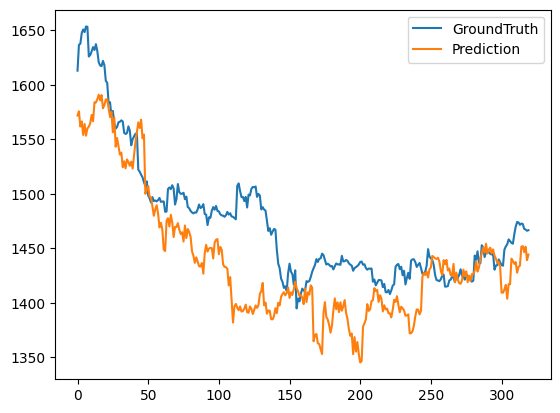

In [131]:
# draw OT prediction
plt.figure()
plt.plot(trues[:,0,0] ,label='GroundTruth')
plt.plot(preds[:,23,0], label='Prediction')
plt.legend()
plt.show()

In [ ]:
def data_stack(data,n,s):
    start=s*args.pred_len
    new_data=data[start,:,-1]
    for i in range(n):
        
        new_data=np.hstack((new_data,data[start+args.pred_len,:,-1]))
        start=start+args.pred_len
    return new_data

In [ ]:
true=data_stack(trues,5,15)
pred=data_stack(preds,5,15)

In [ ]:
# draw OT prediction
#3 factors Vali Loss: 94.9354630 Test Loss: 31.3864365
plt.figure(figsize=(25,15))
plt.plot(true, label='GroundTruth')
plt.plot(pred, label='Prediction')
#plt.plot(c)
plt.axvline(34,color='red',linestyle='--',alpha=0.5)
plt.axvline(69,color='red',linestyle='--',alpha=0.5)
plt.axvline(104,color='red',linestyle='--',alpha=0.5)
plt.axvline(139,color='red',linestyle='--',alpha=0.5)
plt.axvline(174,color='red',linestyle='--',alpha=0.5)
#plt.plot(pred1, label='Prediction1')
plt.legend()
plt.show()

In [ ]:
import argparse
import os
import torch
import sys
import pandas as pd
sys.path.append('/kaggle/input/informer/Informer2020-main')
print(sys.path)
from data.data_loader import Dataset_ETT_hour, Dataset_ETT_minute, Dataset_Custom, Dataset_Pred
import matplotlib.pyplot as plt

In [ ]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [ ]:
from data.data_loader import Dataset_Custom
from torch.utils.data import DataLoader
import pandas as pd
import os

In [ ]:
args = dotdict()

In [ ]:
# class Args:
#     pass
# args = Args()
args.root_path = '/kaggle/input/adani-informer/'
args.data_path = 'adani_data_informer.csv'

df = pd.read_csv(os.path.join(args.root_path, args.data_path))

In [ ]:
df['date'] = pd.to_datetime(df['date']) + pd.DateOffset(hour=15, minute = 30)

In [ ]:

# df.to_csv('adani_data_informer', index=False) 

In [ ]:

args.target = 'Close'
args.freq = 'D'
args.embed = 'fixed'
args.seq_len = 960
args.label_len =48
args.pred_len = 128
args.features = 'MS'
args.data = 'custom'
args.checkpoints = './informer_checkpoints'

In [ ]:
Data = Dataset_Custom
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Dataset_Custom(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    target=args.target, # HULL here
    freq=args.freq, # 'h': hourly, 't':minutely
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    drop_last=drop_last)

In [ ]:
df

In [ ]:
args.model = 'informer'
args.enc_in = 6 # encoder input size
args.dec_in = 6 # decoder input size
args.c_out = 1 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 4 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'fixed' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'h'

args.batch_size = 32 
args.learning_rate = 0.0001

args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 6
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = True
args.devices = '0,1'


In [ ]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [ ]:
data_parser = {
    'tcs': {
        'data': '/kaggle/input/tcs-t2v-70ave/tcs_t2v_70ave.csv',  # The dataset file
        'T': 'Close',                      # The target feature (Close)
        'M': [18, 18, 18],                    # For multivariate forecasting (6 features: Open, High, Low, Volume, Adj Close, excluding Date)
        'S': [1, 1, 1],                    # For univariate forecasting (only one feature, if needed)
        'MS': [18, 18, 1]                    # Multivariate to univariate (6 input features, 1 output feature)
    }
}

In [ ]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [ ]:
print('Args in experiment:')
print(args)

In [ ]:
Exp = Exp_Informer

In [ ]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

In [ ]:
Data = Dataset_Pred
timeenc = 0 if args.embed!='timeF' else 1
flag = 'pred'; shuffle_flag = False; drop_last = True; batch_size = 1
args.inverse = True
data_set = Dataset_Pred(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    target=args.target, # HULL here
    freq=args.freq, # 'h': hourly, 't':minutely
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    drop_last=drop_last)

In [ ]:
import os

# set saved model path
setting = '/kaggle/working/informer_checkpoints/informer_custom_ftMS_sl96_ll48_pl1_dm512_nh4_el2_dl1_df2048_atprob_fc5_ebfixed_dtTrue_mxTrue_exp_0'

In [ ]:
# !rm -rf /kaggle/working/*

In [ ]:
path = os.path.join(args.checkpoints,setting,'checkpoint.pth')

In [ ]:
exp = Exp(args)

exp.predict(setting, True)

In [ ]:
import numpy as np

prediction = np.load('./results/'+setting+'/real_prediction.npy')

prediction.shape